In [23]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split


In [24]:
diabetes = load_diabetes()
df_x = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df_y = pd.DataFrame(diabetes.target,columns =['target'])

In [25]:
X = df_x.to_numpy()
y = df_y.to_numpy().flatten()  

In [26]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=100)

In [27]:
W = np.random.rand(10)
b = np.random.rand()

In [28]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [29]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean() 
    return mse

In [30]:
# 손실 함수 정의
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [31]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = (2/N) * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [32]:
dW, db = gradient(train_x, W, b, train_y)
print("dW:", dW)
print("db:", db)

dW: [-1.5689116  -0.34828248 -4.87439354 -3.740715   -2.26025839 -1.92464291
  2.8066992  -3.58994265 -4.50840943 -3.00734982]
db: -307.37000123493215


In [33]:
LEARNING_RATE = 0.1
losses = []

for i in range(1, 10001):
    dW, db = gradient(train_x, W, b, train_y)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(train_x, W, b, train_y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 6237.7982
Iteration 20 : Loss 5896.0180
Iteration 30 : Loss 5822.5741
Iteration 40 : Loss 5754.3632
Iteration 50 : Loss 5688.2801
Iteration 60 : Loss 5624.2195
Iteration 70 : Loss 5562.1127
Iteration 80 : Loss 5501.8941
Iteration 90 : Loss 5443.5002
Iteration 100 : Loss 5386.8698
Iteration 110 : Loss 5331.9438
Iteration 120 : Loss 5278.6651
Iteration 130 : Loss 5226.9786
Iteration 140 : Loss 5176.8311
Iteration 150 : Loss 5128.1712
Iteration 160 : Loss 5080.9494
Iteration 170 : Loss 5035.1178
Iteration 180 : Loss 4990.6301
Iteration 190 : Loss 4947.4418
Iteration 200 : Loss 4905.5098
Iteration 210 : Loss 4864.7925
Iteration 220 : Loss 4825.2497
Iteration 230 : Loss 4786.8426
Iteration 240 : Loss 4749.5339
Iteration 250 : Loss 4713.2873
Iteration 260 : Loss 4678.0680
Iteration 270 : Loss 4643.8422
Iteration 280 : Loss 4610.5775
Iteration 290 : Loss 4578.2423
Iteration 300 : Loss 4546.8064
Iteration 310 : Loss 4516.2403
Iteration 320 : Loss 4486.5160
Iteration 330 : L

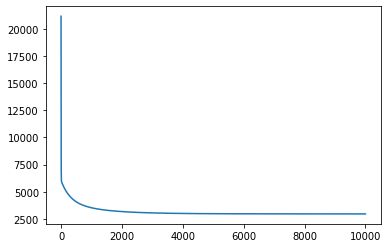

In [34]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [38]:
prediction = model(test_x, W, b)
mse = loss(test_x, W, b, test_y)
mse

2624.8675840582805

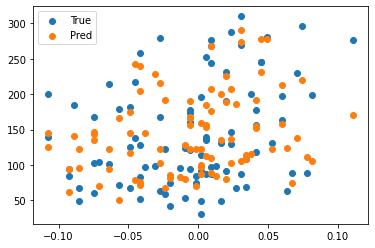

In [41]:
plt.scatter(test_x[:, 0], test_y,label="True")
plt.scatter(test_x[:, 0], prediction,label="Pred")
plt.legend()
plt.show()

In [45]:
W

array([ -49.44940349, -218.97391835,  553.44302674,  331.16383327,
        -42.30080925, -107.71408439, -184.50996123,   95.10337765,
        482.59170906,   76.0696844 ])

In [46]:
b

152.51480199790382